In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/FiveThirtyEight%20Comic%20Characters%20Dataset/dc-wikia-data.csv")
print("Records: ", df.shape[0], "Columns", df.shape)
df.head()

Records:  6896 Columns (6896, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [24]:
df["EYE"].value_counts(dropna=False)

NaN                   3628
Blue Eyes             1102
Brown Eyes             879
Black Eyes             412
Green Eyes             291
Red Eyes               208
White Eyes             116
Yellow Eyes             86
Photocellular Eyes      48
Grey Eyes               40
Hazel Eyes              23
Purple Eyes             14
Violet Eyes             12
Orange Eyes             10
Gold Eyes                9
Auburn Hair              7
Pink Eyes                6
Amber Eyes               5
Name: EYE, dtype: int64

In [25]:
df.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


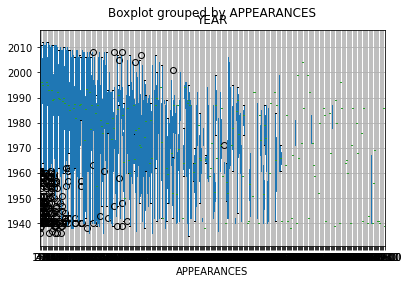

In [26]:
df.boxplot(column="YEAR", by="APPEARANCES")
plt.show()

In [27]:
tidy_data=pd.melt(frame=df, id_vars="name", value_vars=['EYE', 'HAIR'])
tidy_data

,name,variable,value
0,Batman (Bruce Wayne),EYE,Blue Eyes
1,Superman (Clark Kent),EYE,Blue Eyes
2,Green Lantern (Hal Jordan),EYE,Brown Eyes
3,James Gordon (New Earth),EYE,Brown Eyes
4,Richard Grayson (New Earth),EYE,Blue Eyes
...,...,...,...
13787,Nadine West (New Earth),HAIR,NaN
13788,Warren Harding (New Earth),HAIR,NaN
13789,William Harrison (New Earth),HAIR,NaN
13790,William McKinley (New Earth),HAIR,NaN


In [28]:
tidy_data.pivot(index='name', columns='variable', values='value')

variable,EYE,HAIR
name,,
3g4 (New Earth),NaN,NaN
500-ZQ (New Earth),Blue Eyes,NaN
A'Hwiirdh-Paan'A (New Earth),Blue Eyes,Purple Hair
A'monn A'mokk (New Earth),Orange Eyes,NaN
A'morr (New Earth),Orange Eyes,NaN
...,...,...
Zviad Baazovi (New Earth),NaN,Black Hair
Zvvireel (New Earth),NaN,NaN
Zyklon (New Earth),NaN,NaN


In [29]:
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [30]:
df['SEX']=df['SEX'].astype('category')
df.dtypes

page_id                int64
name                  object
urlslug               object
ID                    object
ALIGN                 object
EYE                   object
HAIR                  object
SEX                 category
GSM                   object
ALIVE                 object
APPEARANCES          float64
FIRST APPEARANCE      object
YEAR                 float64
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page_id           6896 non-null   int64   
 1   name              6896 non-null   object  
 2   urlslug           6896 non-null   object  
 3   ID                4883 non-null   object  
 4   ALIGN             6295 non-null   object  
 5   EYE               3268 non-null   object  
 6   HAIR              4622 non-null   object  
 7   SEX               6771 non-null   category
 8   GSM               64 non-null     object  
 9   ALIVE             6893 non-null   object  
 10  APPEARANCES       6541 non-null   float64 
 11  FIRST APPEARANCE  6827 non-null   object  
 12  YEAR              6827 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 653.6+ KB


In [32]:
for each in df:
    print(each, ": ",df[each].isnull().sum(), "/", df.shape[0])

page_id :  0 / 6896
name :  0 / 6896
urlslug :  0 / 6896
ID :  2013 / 6896
ALIGN :  601 / 6896
EYE :  3628 / 6896
HAIR :  2274 / 6896
SEX :  125 / 6896
GSM :  6832 / 6896
ALIVE :  3 / 6896
APPEARANCES :  355 / 6896
FIRST APPEARANCE :  69 / 6896
YEAR :  69 / 6896


In [33]:
data1=df.copy()
data1['ALIVE'].dropna(inplace=True)
data1['EYE'].fillna('empty', inplace=True)
data1['EYE'].value_counts()

empty                 3628
Blue Eyes             1102
Brown Eyes             879
Black Eyes             412
Green Eyes             291
Red Eyes               208
White Eyes             116
Yellow Eyes             86
Photocellular Eyes      48
Grey Eyes               40
Hazel Eyes              23
Purple Eyes             14
Violet Eyes             12
Orange Eyes             10
Gold Eyes                9
Auburn Hair              7
Pink Eyes                6
Amber Eyes               5
Name: EYE, dtype: int64

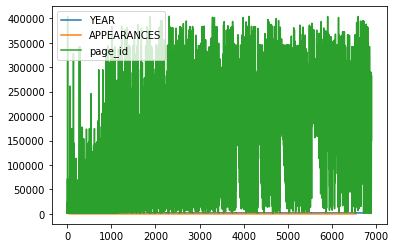

In [34]:
df2=df.loc[:,["YEAR","APPEARANCES", "page_id"]]
df2.plot()
plt.show()

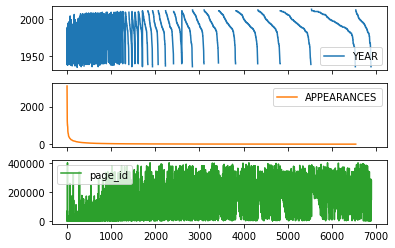

In [35]:
df2.plot(subplots=True)
plt.show()